In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

In [5]:
# load train data to a variable called songs
songs = pd.read_csv("/Users/sa24/Desktop/Spotify TLAB/Spotify-Analysis/Raw data/train.csv")

In [6]:
songs.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,romantic,1.0


In [7]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28362 entries, 0 to 28361
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28362 non-null  int64  
 1   artist_name               28362 non-null  object 
 2   track_name                28362 non-null  object 
 3   release_date              28362 non-null  int64  
 4   genre                     28362 non-null  object 
 5   lyrics                    28362 non-null  object 
 6   len                       28362 non-null  int64  
 7   dating                    28362 non-null  float64
 8   violence                  28362 non-null  float64
 9   world/life                28362 non-null  float64
 10  night/time                28362 non-null  float64
 11  shake the audience        28362 non-null  float64
 12  family/gospel             28362 non-null  float64
 13  romantic                  28362 non-null  float64
 14  commun

In [9]:
# Get a count of how many times each topic shows up in the dataframe
topic_count = songs.value_counts('topic').to_frame
topic_count

<bound method Series.to_frame of topic
sadness       6094
violence      5707
world/life    5419
obscene       4881
music         2303
night/time    1823
romantic      1523
feelings       612
Name: count, dtype: int64>

# Univariate Analysis

/var/folders/fz/fjrs1yms7rbcd_w7wg96j1fm0000gn/T/ipykernel_58258/292550350.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=songs, x="genre", palette="plasma")


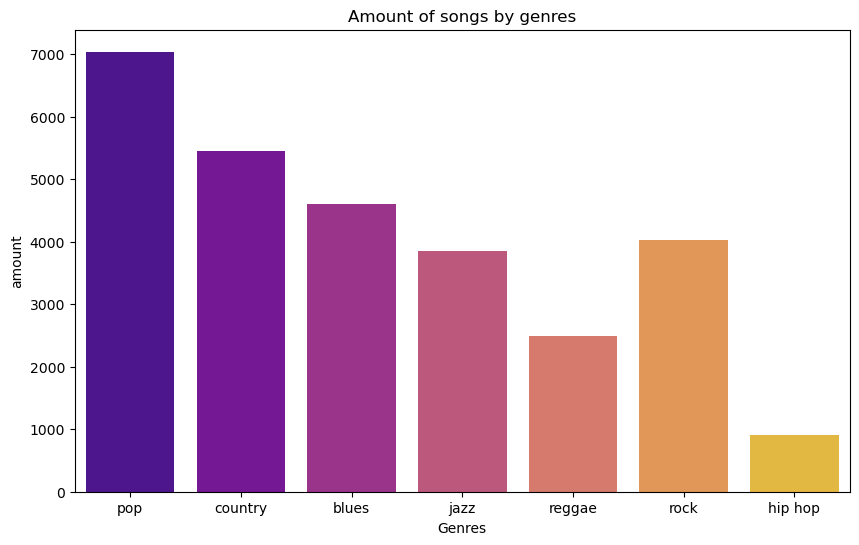

In [18]:
#create a bar plot to plot the genres
plt.figure(figsize=(10,6))
sns.countplot(data=songs, x="genre", palette="plasma")
plt.xlabel("Genres")
plt.ylabel("amount")
plt.title("Amount of songs by genres")
plt.show()

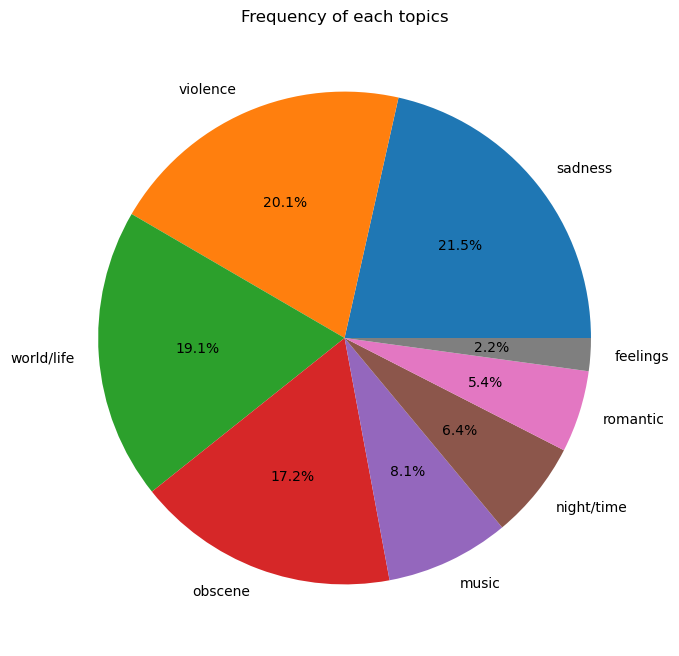

In [10]:
#Check the percentage of toics in the CSV
plt.figure(figsize=(9,8))
songs["topic"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Frequency of each topics')
plt.ylabel("")
plt.show()

<Axes: xlabel='age', ylabel='Density'>

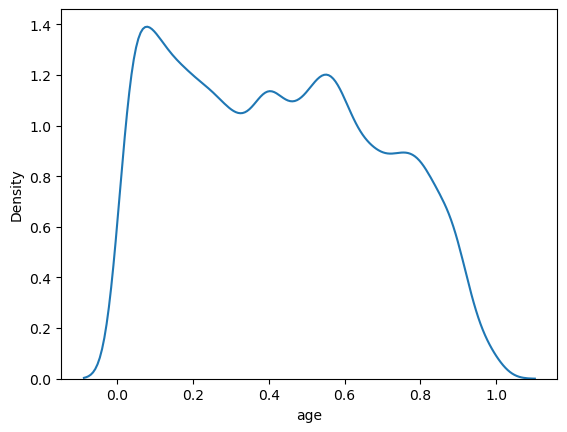

In [11]:
sns.kdeplot(data=songs, x="age")

# Univariate Findings

- Pop music is the most represented Genre in the DataFrame with country in second and Blues in third 
- World/Life, Obscene, Sadness, and violence are the most reocurring music tops 
- There are more recent songs in the dataset than older songs 


# Bivariate Analysis

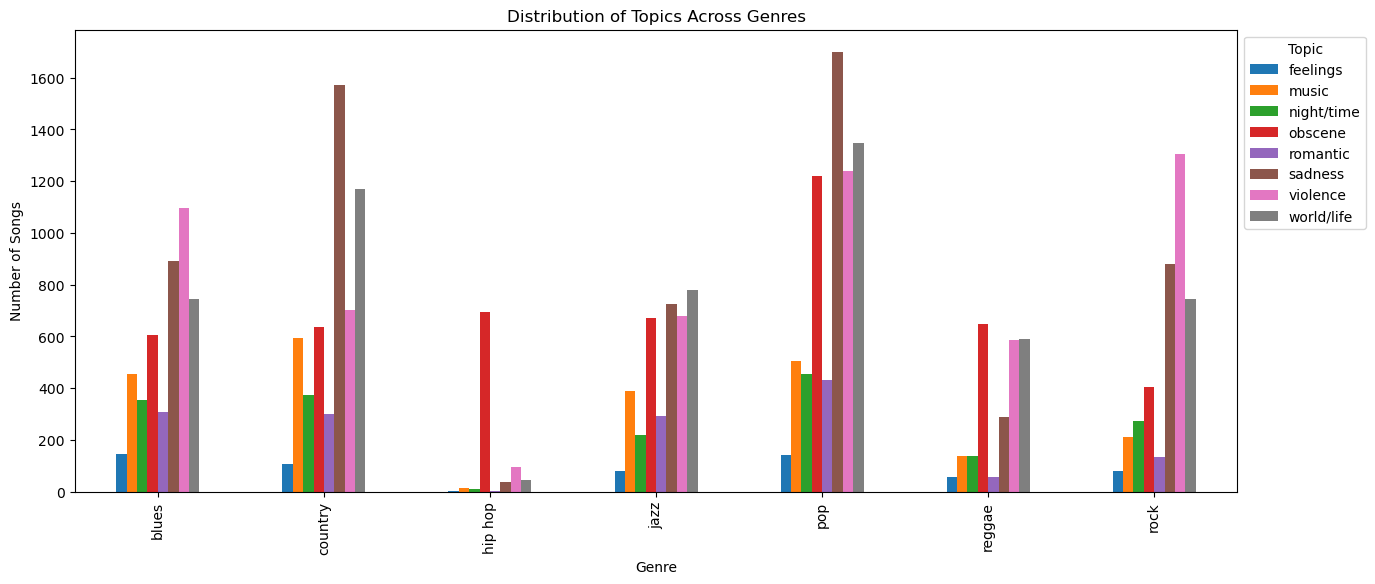

In [12]:

pivot = songs.pivot_table(index='genre', columns='topic', aggfunc='size')

pivot.plot(kind='bar', stacked=False, figsize=(15,6))
plt.title("Distribution of Topics Across Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Songs")
plt.legend(title="Topic", bbox_to_anchor=(1, 1))
plt.show()

Country and pop have the most songs about sadness and they are also the most represneted genres in the dataframe. Rocks seems to be leading the charge in violent music with pop nad blues closely behind. hip hop has the least amount of songs but a majority of them are about obscenities 

<Axes: xlabel='topic', ylabel='release_date'>

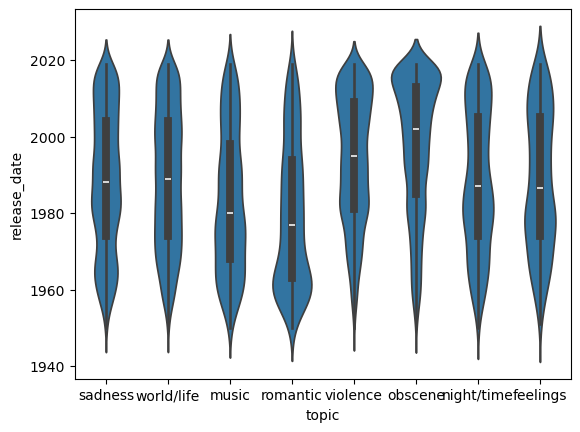

In [13]:
sns.violinplot(x=songs["topic"], y=songs["release_date"])

romanartic songs seems to be steadily decreasing and we go from year to year. Romantic is the only topic experiencing this effect so drastically. We can see a similar trend happening with the music topic.

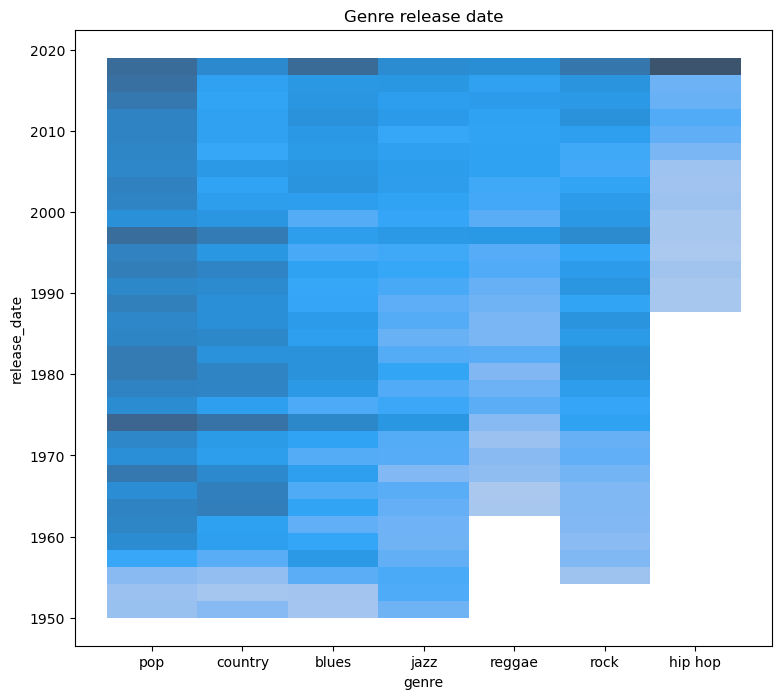

In [14]:
# Get a histogram of which genre's have the oldest release dates
plt.figure(figsize=(9,8))
sns.histplot(data= songs, x= "genre", y="release_date")
plt.title('Genre release date')
plt.show()

# Multivariate Analysis

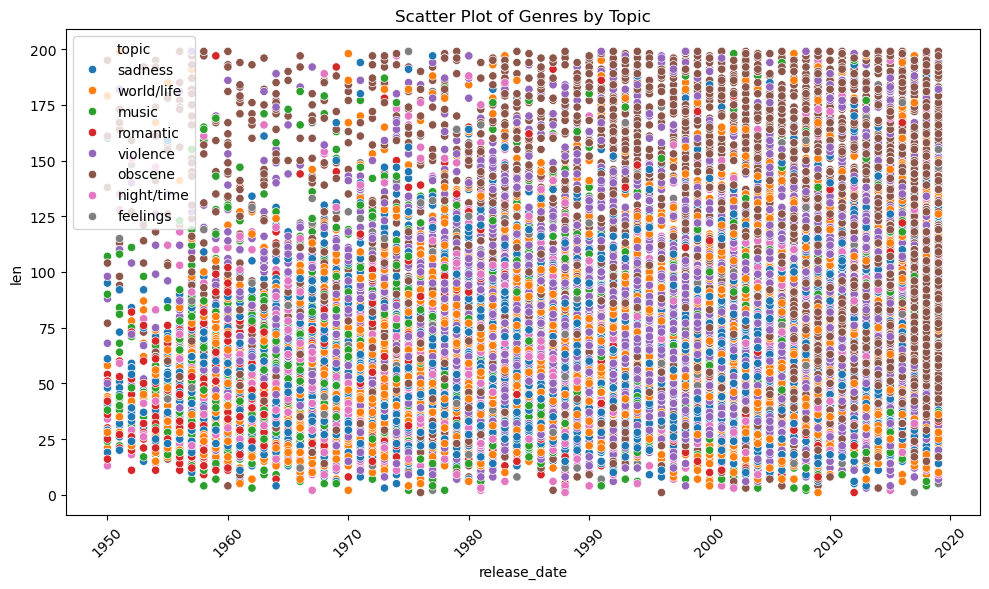

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=songs, x="release_date", y="len", hue="topic", palette="tab10")

plt.title("Scatter Plot of Genres by Topic")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

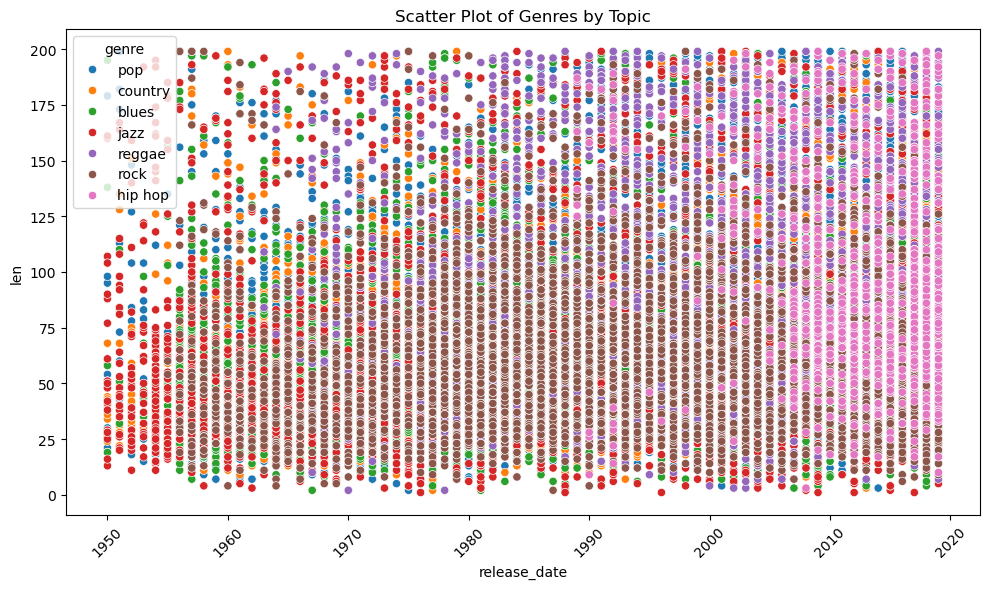

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=songs, x="release_date", y="len", hue="genre", palette="tab10")

plt.title("Scatter Plot of Genres by Topic")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

When I compare both scatter plot there seems to be a connection with hip hop and obscene topic between  2010 and 20200. It's the most noticeble trend shown. another noticible trend is that there was alot of jazz music relesased between 1950 and 1960 which covered a variety of topics